<a href="https://colab.research.google.com/github/WallaceSantana79/CursoMachineLearning/blob/main/Classifica%C3%A7%C3%A3o_de_Textos_com_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de textos com spaCy

## Etapa 1: Importação e instalação das bibliotecas

In [1]:
!pip install seaborn==0.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.9/215.9 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
import spacy
spacy.__version__

In [2]:
!python -m spacy download pt

2024-01-08 11:26:18.551680: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-08 11:26:18.551772: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-08 11:26:18.554607: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-08 11:26:18.570030: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-08 11:26:20.323667: W tensorflow/compiler/tf2

In [3]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Etapa 2: Carregamento da base de dados

In [6]:
base_dados = pd.read_csv('/content/base_treinamento.txt', encoding = 'utf-8')

In [7]:
base_dados.shape

(196, 2)

In [8]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [9]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


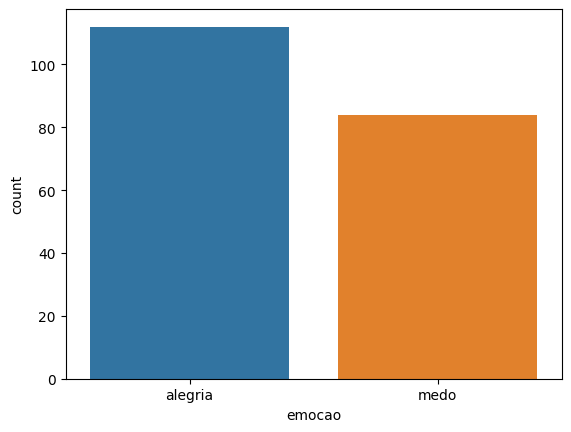

In [10]:
sns.countplot(base_dados['emocao'], label = 'Contagem');

##Etapa 3: Função para pré-processamento dos textos

In [11]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS


In [13]:
print(stop_words)

{'põe', 'faço', 'vários', 'dezoito', 'deste', 'novas', 'mal', 'lá', 'tendes', 'dentro', 'usar', 'lhe', 'tipo', 'nada', 'quieto', 'segunda', 'pois', 'sexta', 'sou', 'segundo', 'teve', 'cima', 'os', 'num', 'fazia', 'cinco', 'tanto', 'sabe', 'números', 'debaixo', 'aqueles', 'dezasseis', 'valor', 'novos', 'quatro', 'ademais', 'vossas', 'diante', 'quinta', 'certeza', 'poderá', 'mil', 'tal', 'embora', 'vos', 'estas', 'oitavo', 'vezes', 'tente', 'têm', 'obrigada', 'zero', 'vens', 'fazem', 'à', 'tempo', 'sexto', 'fazeis', 'parte', 'devem', 'doze', 'também', 'ele', 'sistema', 'posso', 'quer', 'às', 'bom', 'seu', 'querem', 'terceiro', 'está', 'quarta', 'des', 'quinze', 'comprido', 'cedo', 'na', 'aquelas', 'és', 'dessa', 'ela', 'por', 'nesta', 'quem', 'as', 'vossa', 'tarde', 'tentei', 'número', 'novo', 'cuja', 'vosso', 'sobre', 'esse', 'maiorias', 'fomos', 'estes', 'fazes', 'numa', 'quarto', 'mês', 'povo', 'tive', 'suas', 'fim', 'talvez', 'fui', 'dezassete', 'nosso', 'estar', 'porquanto', 'cada',

In [14]:
len(stop_words)

416

In [16]:
pln = spacy.load('pt_core_news_sm')

In [17]:
pln

In [61]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)

  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [62]:
teste = preprocessamento('Estou aprendendo processamento de linguagem natural, curso em Curitiba')
teste

'aprender processamento linguagem natural curso curitiba'

## Etapa4: Pré-processamento da base de dados

###Limpeza dos textos

In [63]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [64]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [65]:
base_dados.head(10)

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
5,adorar cabelo macio,alegria
6,adorar cor de o olho,alegria
7,somo amável outro,alegria
8,sinto afeição,alegria
9,querer agradar filho,alegria


In [66]:
base_dados.tail(10)

,texto,emocao
186,noite perigoso,medo
187,estremecer casa,medo
188,olhar criatura mover monstruosamente,medo
189,aguentar suspense,medo
190,afugente cão,medo
191,chocado amedrontar assassinato brutal,medo
192,preciso afugentar ímpeto medo de o inferno,medo
193,político força afugentar amedrontar,medo
194,objetivo de isso amedrontar,medo
195,apavorar,medo


###Tratamento da classe

In [67]:
exemplo_base_dados = [['este trabalho é agradável',{'ALEGRIA':True,'MEDO':False}],
                      ['este lugar continua assustador',{'ALEGRIA':False, 'MEDO':True}]]

In [68]:
type(exemplo_base_dados)

list

In [69]:
exemplo_base_dados[0]

['este trabalho é agradável', {'ALEGRIA': True, 'MEDO': False}]

In [70]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [71]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [73]:
type(exemplo_base_dados[0][1])

dict

In [75]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO':False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO':True})

  base_dados_final.append([texto,dic.copy()])

In [76]:
len(base_dados_final)

196

In [77]:
base_dados_final[0]

['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}]

In [78]:
base_dados_final[0][0]

'trabalho agradável'

In [79]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [80]:
type(base_dados_final[0][1])

dict

In [81]:
base_dados_final

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gosto ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}],
 ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelo macio', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somo amável outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amo', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixoneir', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sintar hoje', {'ALEGRIA': Tr

## Etapa 5: Criação do classificador

In [86]:
from spacy.training import Example

In [83]:
modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("ALEGRIA")
textcat.add_label("MEDO")
historico = []

In [87]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
    modelo.update(examples, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 1.739656150341034}
{'textcat': 3.1850316438084e-11}
{'textcat': 4.304132706712052e-12}
{'textcat': 1.0692863153076437e-12}
{'textcat': 3.693750576808314e-13}
{'textcat': 1.56081732045519e-13}
{'textcat': 7.119030452624022e-14}
{'textcat': 3.7485649545019955e-14}
{'textcat': 1.7989782095093922e-14}
{'textcat': 9.78067186601175e-15}


In [89]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [90]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.73965615e+00, 3.18503164e-11, 4.30413271e-12, 1.06928632e-12,
       3.69375058e-13, 1.56081732e-13, 7.11903045e-14, 3.74856495e-14,
       1.79897821e-14, 9.78067187e-15])

Text(0, 0.5, 'Erro')

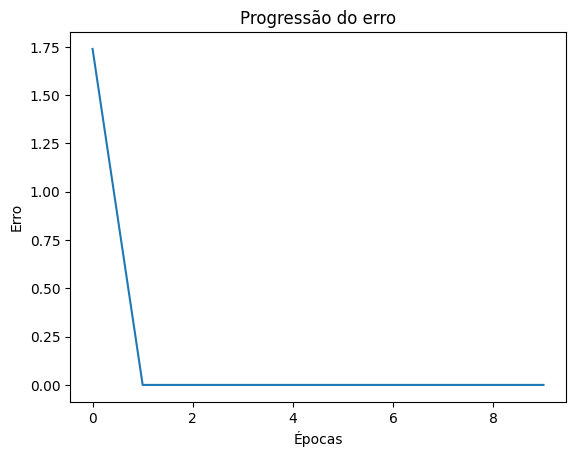

In [93]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [94]:
modelo.to_disk('modelo')

## Etapa6: Testes com uma frase

## Etapa 7: Avaliação do modelo

### Avaliação na base de treinamento

### Avaliação na base de teste